In [30]:
import geopandas as gp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from shapely.geometry import Polygon

plt.rcParams['figure.figsize'] = (10, 20)
%matplotlib inline

In [20]:
base_file = "../data/AvalDet_20190424_155109_ref_20190313_trno_087_VV/AvalDet_20190424_155109_ref_20190313_trno_087_VV.shp"
gdf = gp.read_file(base_file)
gdf.drop(index=1, inplace=True)
gdf.head()

,area,aspect,det_count,east,length,north,raster_val,refdate,sat_geom,source,...,vh1_max,vv0_mean,vv0_median,vv0_min,vv0_max,vh0_mean,vh0_median,vh0_min,vh0_max,geometry
0,10394.8943,None,1,20.944515,793.557988,69.714452,11.0,2019-03-13 15:50:19.000220,87,AvalDet_20190424_155109_ref_20190313_trno_087_...,...,-15.749162,-10.2966,-10.15564,-13.197838,-7.651885,-19.937243,-20.155186,-22.938601,-16.017008,"POLYGON ((20.94465714165575 69.71382402696912,..."


In [21]:
gdf.columns



Index(['area', 'aspect', 'det_count', 'east', 'length', 'north', 'raster_val',
       'refdate', 'sat_geom', 'source', 't_0', 't_1', 'time', 'track_id',
       'uuid', 'width', 'dem_mean', 'dem_median', 'dem_min', 'dem_max',
       'slp_mean', 'slp_median', 'slp_min', 'slp_max', 'asp_mean',
       'asp_median', 'asp_min', 'asp_max', 'vv1_mean', 'vv1_median', 'vv1_min',
       'vv1_max', 'vh1_mean', 'vh1_median', 'vh1_min', 'vh1_max', 'vv0_mean',
       'vv0_median', 'vv0_min', 'vv0_max', 'vh0_mean', 'vh0_median', 'vh0_min',
       'vh0_max', 'geometry'],
      dtype='object')

In [27]:
# Add a name to the polygon
gdf['_name'] = "Original"

# convert t_0 (the time the reference image was taken) into a datetime object and give it a descriptive name
gdf['_reference_date'] = pd.to_datetime(gdf['t_0']) # this actually overwrites the existing column "refdate", but since it is a duplicate of t_0 we don't care. 

# convert t_1 (the time the activity image was taken) into a datetime object and give it a descriptive name
gdf['_detection_date'] = pd.to_datetime(gdf['t_1'])


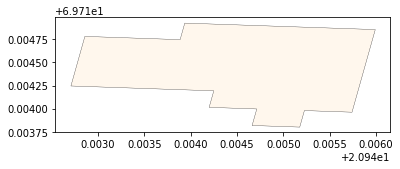

In [28]:
aval_map = gdf.plot(column="area", linewidth=0.3, edgecolor='black', cmap="OrRd", alpha=0.9)


In [29]:
plg = gdf['geometry'][0]
print(type(plg), plg)

<class 'shapely.geometry.polygon.Polygon'> POLYGON ((20.94465714165575 69.71382402696912, 20.94470735316531 69.71400241245273, 20.94419325473413 69.71401983461618, 20.9442434628668 69.7141982202462, 20.94372935925285 69.71421564107656, 20.94270114931648 69.71425047823899, 20.94285174061144 69.71478563650619, 20.94387997622828 69.71475079834599, 20.94393018369257 69.71492918406263, 20.94547254318632 69.71487691507734, 20.94598666121134 69.71485948908331, 20.94573554731867 69.71396756362762, 20.94522145069351 69.71398498878987, 20.94517123490418 69.71380660347262, 20.94465714165575 69.71382402696912))


In [34]:
# Create some simple polygons
e_base = 20.94
n_base= 69.71

In [35]:
le = e_base + 0.005 # left_easting
re = le + 0.002 # right_easting
bn = n_base + 0.005 # bottom_northing
tn = bn + 0.002 # top_northing
p1 = Polygon([(le, bn), (re, bn), (re, tn), (le, tn)])

# Create a copy of the original polygon and alter its properties
scn_1 = gdf.copy(deep=True)
scn_1['_name'] = "Scenario 1"
scn_1['geometry'] = p1


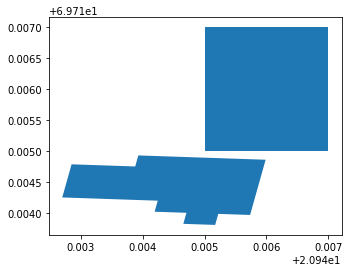

In [36]:
ax = gdf.plot()
scn_1.plot(ax=ax)

